In [13]:
import src.edhec_risk_kit as erk
import pandas as pd
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2

#To avoid scientific notation display
pd.options.display.float_format = '{:.5f}'.format

#To reset, un-comment the following
#pd.reset_option

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
df = erk.read_Portfolios_Formed_on_ME_monthly_EW(data_loc = 'data/')

In [56]:
df.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
1926-07,nan,-0.00430,0.01520,0.02680,-0.00570,0.00590,0.01600,0.01470,0.03330,-0.01450,0.00290,-0.00150,0.01330,0.01240,0.01980,0.01550,0.01380,0.03380,0.03290
1926-08,nan,0.03900,0.03040,0.02090,0.03840,0.03590,0.03710,0.01610,0.02330,0.05120,0.02590,0.04030,0.03150,0.02720,0.04720,0.01600,0.01630,0.00980,0.03700
1926-09,nan,-0.01080,-0.00540,0.00160,-0.00480,-0.01400,0.00000,-0.00500,-0.00090,0.00930,-0.01870,-0.02270,-0.00530,0.00070,-0.00070,-0.01640,0.00640,-0.00860,0.00670
1926-10,nan,-0.03320,-0.03520,-0.03060,-0.03290,-0.04100,-0.02890,-0.03360,-0.02950,-0.04840,-0.01770,-0.03360,-0.04830,-0.02980,-0.02800,-0.03450,-0.03270,-0.03470,-0.02430
1926-11,nan,-0.00460,0.03820,0.03090,-0.00550,0.02180,0.03410,0.03390,0.03160,-0.00780,-0.00320,-0.00290,0.04650,0.03240,0.03570,0.03820,0.02950,0.03610,0.02700


In [16]:
rets = df[['Lo 30', 'Hi 30']]
rets.columns = ['SmallCap','LargeCap']
rets.head()

,SmallCap,LargeCap
1926-07,-0.00430,0.02680
1926-08,0.03900,0.02090
1926-09,-0.01080,0.00160
1926-10,-0.03320,-0.03060
1926-11,-0.00460,0.03090


In [18]:
smallcap_df = erk.drawdown(rets['SmallCap'])
largecap_df = erk.drawdown(rets['LargeCap'])

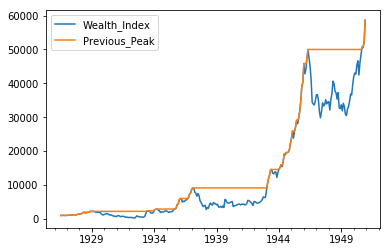

In [22]:
smallcap_df[:"1950"][["Wealth_Index", "Previous_Peak"]].plot()

In [24]:
largecap_df.head()
largecap_df.columns = ['lc'+col for col in largecap_df.columns]

In [25]:
smallcap_df.head()
smallcap_df.columns = ['sc'+col for col in smallcap_df.columns]

In [26]:
largecap_df.head()

,lcReturns,lcWealth_Index,lcPrevious_Peak,lcDrawdown
1926-07,0.02680,1026.80000,1026.80000,0.00000
1926-08,0.02090,1048.26012,1048.26012,0.00000
1926-09,0.00160,1049.93734,1049.93734,0.00000
1926-10,-0.03060,1017.80925,1049.93734,-0.03060
1926-11,0.03090,1049.25956,1049.93734,-0.00065


In [27]:
smallcap_df.head()

,scReturns,scWealth_Index,scPrevious_Peak,scDrawdown
1926-07,-0.00430,995.70000,995.70000,0.00000
1926-08,0.03900,1034.53230,1034.53230,0.00000
1926-09,-0.01080,1023.35935,1034.53230,-0.01080
1926-10,-0.03320,989.38382,1034.53230,-0.04364
1926-11,-0.00460,984.83266,1034.53230,-0.04804


In [37]:
#Join the data frames
final_df = pd.concat([largecap_df, smallcap_df], axis=1, ignore_index=False)
final_df.head()

,lcReturns,lcWealth_Index,lcPrevious_Peak,lcDrawdown,scReturns,scWealth_Index,scPrevious_Peak,scDrawdown
1926-07,0.02680,1026.80000,1026.80000,0.00000,-0.00430,995.70000,995.70000,0.00000
1926-08,0.02090,1048.26012,1048.26012,0.00000,0.03900,1034.53230,1034.53230,0.00000
1926-09,0.00160,1049.93734,1049.93734,0.00000,-0.01080,1023.35935,1034.53230,-0.01080
1926-10,-0.03060,1017.80925,1049.93734,-0.03060,-0.03320,989.38382,1034.53230,-0.04364
1926-11,0.03090,1049.25956,1049.93734,-0.00065,-0.00460,984.83266,1034.53230,-0.04804


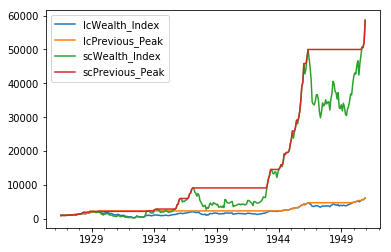

In [38]:
final_df[['lcWealth_Index','lcPrevious_Peak','scWealth_Index','scPrevious_Peak']][:"1950"].plot()

In [39]:
df = pd.DataFrame({'SmallCap': [-0.0145, 0.0512, 0.0093, -0.0484, -0.0078],
                                'LargeCap': [0.0329, 0.0370, 0.0067, -0.0243, 0.0270]})

In [40]:
df

,SmallCap,LargeCap
0,-0.01450,0.03290
1,0.05120,0.03700
2,0.00930,0.00670
3,-0.04840,-0.02430
4,-0.00780,0.02700


In [43]:
erk.drawdown(df['SmallCap'])

,Returns,Wealth_Index,Previous_Peak,Drawdown
0,-0.01450,985.50000,985.50000,0.00000
1,0.05120,1035.95760,1035.95760,0.00000
2,0.00930,1045.59201,1045.59201,0.00000
3,-0.04840,994.98535,1045.59201,-0.04840
4,-0.00780,987.22447,1045.59201,-0.05582


In [48]:
erk.drawdown(df['SmallCap'])['Drawdown'].values

array([ 0.        ,  0.        ,  0.        , -0.0484    , -0.05582248])

In [49]:
df.head()

,SmallCap,LargeCap
0,-0.01450,0.03290
1,0.05120,0.03700
2,0.00930,0.00670
3,-0.04840,-0.02430
4,-0.00780,0.02700


In [61]:
#((df - df.mean())**3).sum()/(df.std()**3)
#(df - df.mean() )**3
df.std()

<= 0         nan
Lo 30    0.09121
Med 40   0.07066
Hi 30    0.05816
Lo 20    0.09720
Qnt 2    0.07929
Qnt 3    0.07048
Qnt 4    0.06394
Hi 20    0.05633
Lo 10    0.10629
Dec 2    0.09118
Dec 3    0.08193
Dec 4    0.07723
Dec 5    0.07213
Dec 6    0.06933
Dec 7    0.06592
Dec 8    0.06263
Dec 9    0.05953
Hi 10    0.05390
dtype: float64

In [67]:
df = erk.read_edhec_hedgefundindices(data_loc='data/')

In [68]:
df.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.01190,0.03930,0.01780,0.07910,0.01890,0.02130,0.01910,0.05730,0.02810,0.01500,0.01800,-0.01660,0.03170
1997-02,0.01230,0.02980,0.01220,0.05250,0.01010,0.00840,0.01220,0.01750,-0.00060,0.00340,0.01180,0.04260,0.01060
1997-03,0.00780,-0.00210,-0.00120,-0.01200,0.00160,-0.00230,0.01090,-0.01190,-0.00840,0.00600,0.00100,0.07780,-0.00770
1997-04,0.00860,-0.01700,0.00300,0.01190,0.01190,-0.00050,0.01300,0.01720,0.00840,-0.00010,0.01220,-0.01290,0.00090
1997-05,0.01560,-0.00150,0.02330,0.03150,0.01890,0.03460,0.01180,0.01080,0.03940,0.01970,0.01730,-0.07370,0.02750


In [79]:
#df.columns
erk.skewness(df['Convertible Arbitrage'])

-2.639592225108922

In [82]:
erk.kurtosis(df).sort_values()

CTA Global                2.95296
Long/Short Equity         4.52389
Global Macro              5.74168
Short Selling             6.11777
Funds Of Funds            7.07015
Distressed Securities     7.88998
Event Driven              8.03583
Merger Arbitrage          8.73895
Emerging Markets          9.25079
Relative Value           12.12121
Equity Market Neutral    17.21856
Convertible Arbitrage    23.28083
Fixed Income Arbitrage   29.84220
dtype: float64

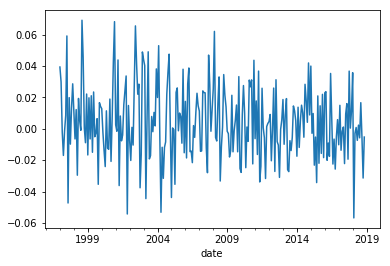

In [102]:
df['CTA Global'].plot.line()

In [90]:
erk.is_normal(df)

[True, 0.0]

In [101]:
erk.jarque_bera_test(df, alpha=0.1)

Convertible Arbitrage                        [False, 0.0]
CTA Global                     [True, 0.5099837302620382]
Distressed Securities                        [False, 0.0]
Emerging Markets                             [False, 0.0]
Equity Market Neutral                        [False, 0.0]
Event Driven                                 [False, 0.0]
Fixed Income Arbitrage                       [False, 0.0]
Global Macro                                 [False, 0.0]
Long/Short Equity         [False, 1.0583442799916298e-07]
Merger Arbitrage                             [False, 0.0]
Relative Value                               [False, 0.0]
Short Selling                                [False, 0.0]
Funds Of Funds                               [False, 0.0]
dtype: object

In [104]:
erk.semi_deviation(df)

Convertible Arbitrage    0.01954
CTA Global               0.01244
Distressed Securities    0.01519
Emerging Markets         0.02804
Equity Market Neutral    0.00957
Event Driven             0.01543
Fixed Income Arbitrage   0.01776
Global Macro             0.00658
Long/Short Equity        0.01405
Merger Arbitrage         0.00887
Relative Value           0.01224
Short Selling            0.02728
Funds Of Funds           0.01212
dtype: float64

In [105]:
df.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.01190,0.03930,0.01780,0.07910,0.01890,0.02130,0.01910,0.05730,0.02810,0.01500,0.01800,-0.01660,0.03170
1997-02,0.01230,0.02980,0.01220,0.05250,0.01010,0.00840,0.01220,0.01750,-0.00060,0.00340,0.01180,0.04260,0.01060
1997-03,0.00780,-0.00210,-0.00120,-0.01200,0.00160,-0.00230,0.01090,-0.01190,-0.00840,0.00600,0.00100,0.07780,-0.00770
1997-04,0.00860,-0.01700,0.00300,0.01190,0.01190,-0.00050,0.01300,0.01720,0.00840,-0.00010,0.01220,-0.01290,0.00090
1997-05,0.01560,-0.00150,0.02330,0.03150,0.01890,0.03460,0.01180,0.01080,0.03940,0.01970,0.01730,-0.07370,0.02750


In [116]:
erk.var_historic(df, level=0.01)

Convertible Arbitrage    0.12315
CTA Global               0.05673
Distressed Securities    0.08344
Emerging Markets         0.19065
Equity Market Neutral    0.05791
Event Driven             0.08792
Fixed Income Arbitrage   0.08653
Global Macro             0.03128
Long/Short Equity        0.06738
Merger Arbitrage         0.05370
Relative Value           0.06880
Short Selling            0.13374
Funds Of Funds           0.06179
dtype: float64

In [117]:
erk.var_gaussian(df, level=0.01, modified=True)

Convertible Arbitrage    0.10010
CTA Global               0.04661
Distressed Securities    0.05751
Emerging Markets         0.12798
Equity Market Neutral    0.04025
Event Driven             0.05704
Fixed Income Arbitrage   0.06078
Global Macro             0.02224
Long/Short Equity        0.05161
Merger Arbitrage         0.03288
Relative Value           0.04640
Short Selling            0.10981
Funds Of Funds           0.05003
dtype: float64

In [118]:
erk.var_gaussian(df, level=0.01)

Convertible Arbitrage    0.03296
CTA Global               0.05011
Distressed Securities    0.03262
Emerging Markets         0.06930
Equity Market Neutral    0.01438
Event Driven             0.03253
Fixed Income Arbitrage   0.02243
Global Macro             0.02878
Long/Short Equity        0.03996
Merger Arbitrage         0.01698
Relative Value           0.02087
Short Selling            0.11256
Funds Of Funds           0.03188
dtype: float64

In [119]:
erk.cvar_historic(df, level=0.01)

Convertible Arbitrage    0.12370
CTA Global               0.05680
Distressed Securities    0.08360
Emerging Markets         0.19220
Equity Market Neutral    0.05870
Event Driven             0.08860
Fixed Income Arbitrage   0.08670
Global Macro             0.03130
Long/Short Equity        0.06750
Merger Arbitrage         0.05440
Relative Value           0.06920
Short Selling            0.13400
Funds Of Funds           0.06180
dtype: float64